<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
from scipy.optimize import minimize

In [37]:
from numpy.random import default_rng
rng = default_rng(123)

In [4]:
data_path = "https://github.com/darrenjw/logreg/raw/main/pima.parquet"

In [5]:
df = pd.read_parquet(data_path)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   npreg   200 non-null    int32   
 1   glu     200 non-null    int32   
 2   bp      200 non-null    int32   
 3   skin    200 non-null    int32   
 4   bmi     200 non-null    float64 
 5   ped     200 non-null    float64 
 6   age     200 non-null    int32   
 7   type    200 non-null    category
dtypes: category(1), float64(2), int32(5)
memory usage: 7.5 KB


In [9]:
df.head()

,npreg,glu,bp,skin,bmi,ped,age,type
0,5,86,68,28,30.2,0.364,24,No
1,7,195,70,33,25.1,0.163,55,Yes
2,5,77,82,41,35.8,0.156,35,No
3,0,165,76,43,47.9,0.259,26,No
4,0,107,60,25,26.4,0.133,23,No


In [10]:
df.describe()

,npreg,glu,bp,skin,bmi,ped,age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.570000,123.970000,71.260000,29.215000,32.310000,0.460765,32.110000
std,3.366268,31.667225,11.479604,11.724594,6.130212,0.307225,10.975436
min,0.000000,56.000000,38.000000,7.000000,18.200000,0.085000,21.000000
25%,1.000000,100.000000,64.000000,20.750000,27.575000,0.253500,23.000000
50%,2.000000,120.500000,70.000000,29.000000,32.800000,0.372500,28.000000
75%,6.000000,144.000000,78.000000,36.000000,36.500000,0.616000,39.250000
max,14.000000,199.000000,110.000000,99.000000,47.900000,2.288000,63.000000


In [6]:
n, p = df.shape

In [7]:
print(n, p)

200 8


In [13]:
y = pd.get_dummies(df.type).Yes.to_numpy(dtype="float32")

In [14]:
y

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.], dtype=float32)

In [15]:
X = np.hstack((np.ones((n, 1)), df.drop(columns="type").to_numpy()))

In [31]:
print(X)

[[1.00e+00 5.00e+00 8.60e+01 ... 3.02e+01 3.64e-01 2.40e+01]
 [1.00e+00 7.00e+00 1.95e+02 ... 2.51e+01 1.63e-01 5.50e+01]
 [1.00e+00 5.00e+00 7.70e+01 ... 3.58e+01 1.56e-01 3.50e+01]
 ...
 [1.00e+00 0.00e+00 1.06e+02 ... 3.94e+01 6.05e-01 2.20e+01]
 [1.00e+00 1.00e+00 1.18e+02 ... 3.33e+01 2.61e-01 2.30e+01]
 [1.00e+00 8.00e+00 1.55e+02 ... 3.40e+01 5.43e-01 4.60e+01]]


In [32]:
print(y)

[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1.]


In [58]:
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

In [66]:
n = 100
x1 = rng.standard_normal(n)
x2 = rng.uniform(0, 1, n)

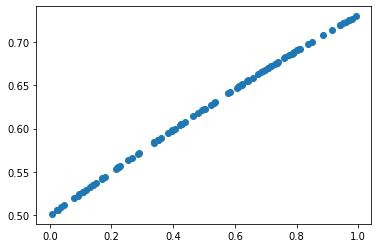

In [73]:
plt.scatter(x1, logistic(x1))
plt.show()

In [33]:
def log_lik(beta):
    return np.sum(-np.log(1 + np.exp(-(2 * y - 1) * (X.dot(beta)))))

In [54]:
init = rng.standard_normal(p) * .1
print(init)

[-0.03117949  0.03377691 -0.22074711  0.08279214  0.15416304  0.11268068
  0.07547696 -0.01459779]


In [55]:
mle = minimize(lambda _: -log_lik(_), init, method="BFGS")

In [56]:
print(mle.x)

[-9.77301876e+00  1.03183422e-01  3.21166789e-02 -4.76780079e-03
 -1.91652348e-03  8.36236262e-02  1.82040854e+00  4.11835886e-02]


In [57]:
print(log_lik(mle.x))

-89.19533323346697
